In [73]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

### Create custom SGD

In [74]:
def CustomSGD( train_data, target, learning_rate,iterations, batch, divideby):
   
    # initialize w and b parameters
    w = np.zeros(shape=(1, train_data.shape[1]-1))
    b = 0
    
    current = 1
    
    while current<=iterations:
        
        # we peak mini batch from training data
        temp = train_data.sample(batch)
        
        # we separate x,y from training data
        y = np.array(temp[target])
        x = np.array(temp.drop(target, axis = 1))
        
        # we initialize gradients
        w_gradient = np.zeros(shape=(1, train_data.shape[1]-1))
        b_gradient = 0
        
        # calculate gradients for every point in mini batch
        for i in range(batch):
            prediction = np.dot(w,x[i]+b)
            w_gradient =w_gradient + (-2)*x[i]*(y[i]-prediction)
            b_gradient = b_gradient+(-2)*(y[i]-prediction)
        
        # update w and b with gradients
        w = w-learning_rate*(w_gradient/batch)
        b = b - learning_rate*(b_gradient/batch)
        
        # increment the iteration by one
        current+=1
        
        #divide learning rate 
        learning_rate /= divideby
        
        return w,b
        
def predict(x,w,b):
    y_pred = []
    for i in range(len(x)):
        y= np.asscalar(np.dot(w,x[i]+b))
        y_pred.append(y)
    return np.array(y_pred)
        

### Data loading, splitting and standardizing:

In [75]:
# load training data where each column of the array is a feature
boston_data = pd.DataFrame(load_boston().data,columns = load_boston()\
    .feature_names)

# load Y, X array
Y= load_boston().target
X= load_boston().data

# split dataset to train and test data
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3)

# standardize data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



### Linear Regression with sklearn SGDRegressor

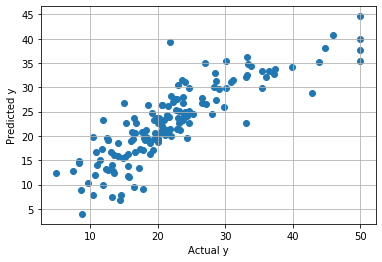

Mean Squared Error : 23.383528201418915
Mean Squared Error : 564.3762674226637


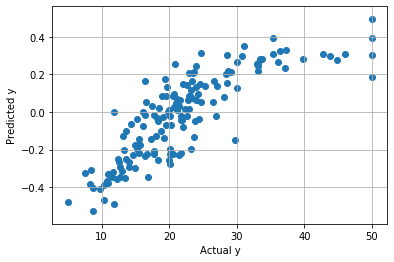

In [76]:
iterations = 1000

# run sgd with sklearn
defaultSGD = SGDRegressor(max_iter = iterations)
defaultSGD.fit(x_train, y_train)

default_pred_y = defaultSGD.predict(x_test)

# plot result
plt.scatter(y_test,default_pred_y)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, default_pred_y))



# adding the target target column in the data
train_data = pd.DataFrame(x_train)
train_data['price'] = y_train
train_data.head(3)

x_test=np.array(x_test)
y_test=np.array(y_test)

# run sgd with custom SGD
w,b = CustomSGD(train_data = train_data,target= 'price', learning_rate=0.001,
                                                  iterations=iterations, 
                divideby=1,
                batch=10)
custom_pred_y =predict(x_test,w,b)

# plot result
plt.scatter(y_test,custom_pred_y)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, custom_pred_y))